#### `HOUSING DATA ANALYSIS`

*`Note:`* `Summary is in the Report.md`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 4801 rows and 17 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [5]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

`As we can see that there are no null values.`

In [6]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [7]:
df.sample(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
2595,Brokered by Serhant,Condo for sale,3890000,3,4.000000,2446.000000,219 E 44th St Unit 31,"New York, NY 10017","219 E 44th St Unit 31New York, NY 10017",New York,New York County,New York,Manhattan,219,"219 E 44th St #31, New York, NY 10017, USA",40.751850,-73.972517
429,Brokered by Keller Williams NYC,Townhouse for sale,2850000,4,4.000000,4080.000000,30-53 35th St,"Queens, NY 11103","30-53 35th StQueens, NY 11103",United States,New York,Queens County,Queens,35th Street,"30-53 35th St, Long Island City, NY 11103, USA",40.763924,-73.919058
4101,Brokered by BERKSHIRE HATHAWAY,Land for sale,675000,3,2.373861,2184.207862,34 Brighton 4th Walk,"Brooklyn, NY 11235","34 Brighton 4th WalkBrooklyn, NY 11235",United States,New York,Kings County,Brooklyn,Brighton 4th Walk,"34 Brighton 4th Walk, Brooklyn, NY 11235, USA",40.580263,-73.963861
1481,Brokered by Douglas Elliman - 3544 Johnson Ave,House for sale,4900000,8,2.373861,9000.000000,5040 Goodridge Ave,"Bronx, NY 10471","5040 Goodridge AveBronx, NY 10471",United States,New York,Bronx County,The Bronx,Goodridge Avenue,"5040 Goodridge Ave, Bronx, NY 10471, USA",40.898308,-73.902085
934,Brokered by EXIT REALTY FIRST CHOICE,Multi-family home for sale,1195000,11,6.000000,2184.207862,2312 Beaumont Ave,"Bronx, NY 10458","2312 Beaumont AveBronx, NY 10458",United States,New York,Bronx County,The Bronx,Beaumont Avenue,"2312 Beaumont Ave, Bronx, NY 10458, USA",40.852638,-73.885053


In [8]:
df['SUBLOCALITY'].unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [9]:
df.groupby('SUBLOCALITY')['PRICE'].sum().sort_values(ascending=False).head(10)

SUBLOCALITY
New York County    2914683797
Richmond County    2605246979
New York           2574577614
Kings County       1305302830
Queens County       776869662
Brooklyn            401194587
Bronx County        313405709
Queens              246271858
Manhattan            75808000
The Bronx            61937390
Name: PRICE, dtype: int64

In [11]:
df['BROKERTITLE'].sample(10)

4716    Brokered by Sotheby's International Realty - E...
465            Brokered by Stuyvesant Heights Realty Corp
1265           Brokered by Jamie & Connie Real Estate Grp
2245                             Brokered by Prime Realty
1656      Brokered by Elegran Real Estate And Development
4230                       Brokered by Corcoran West Side
2703           Brokered by First Class Realty Enterprises
2195    Brokered by Sotheby's International Realty - D...
1050                       Brokered by Gillani Homes Inc.
2736                          Brokered by Macaluso Realty
Name: BROKERTITLE, dtype: object

In [12]:
df['Broker_Names'] = df['BROKERTITLE'].str.split(n=2).str[2].str.split('-').str[0].str.strip()

In [13]:
df.head(2)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Broker_Names
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,Douglas Elliman
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,Serhant


In [14]:
# Top 10 Brokers
df.groupby(['Broker_Names'])['TYPE'].count().sort_values(ascending=False).head(10)

Broker_Names
COMPASS                             456
Douglas Elliman                     301
Brown Harris Stevens                164
Sotheby's International Realty      105
Corcoran East Side                   91
RE MAX Edge                          79
Winzone Realty Inc                   68
E Realty International Corp          59
Serhant                              54
RE MAX Real Estate Professionals     52
Name: TYPE, dtype: int64

In [15]:
top_10_brokers = df.groupby('Broker_Names',as_index=False)['PRICE'].sum().sort_values(by='PRICE',ascending=False).head(10)
top_10_brokers

,Broker_Names,PRICE
14,ANNE LOPA REAL ESTATE,2147483647
171,COMPASS,1286402066
288,Douglas Elliman,1038405233
877,Sotheby's International Realty,686269000
245,Corcoran East Side,566266384
862,Serhant,496933997
134,Brown Harris Stevens,472815700
653,"Nest Seekers International, Midtown",201125641
244,Corcoran Chelsea/Flatiron,152730994
386,"Garfield, Leslie J. & Co., Inc.",134119000


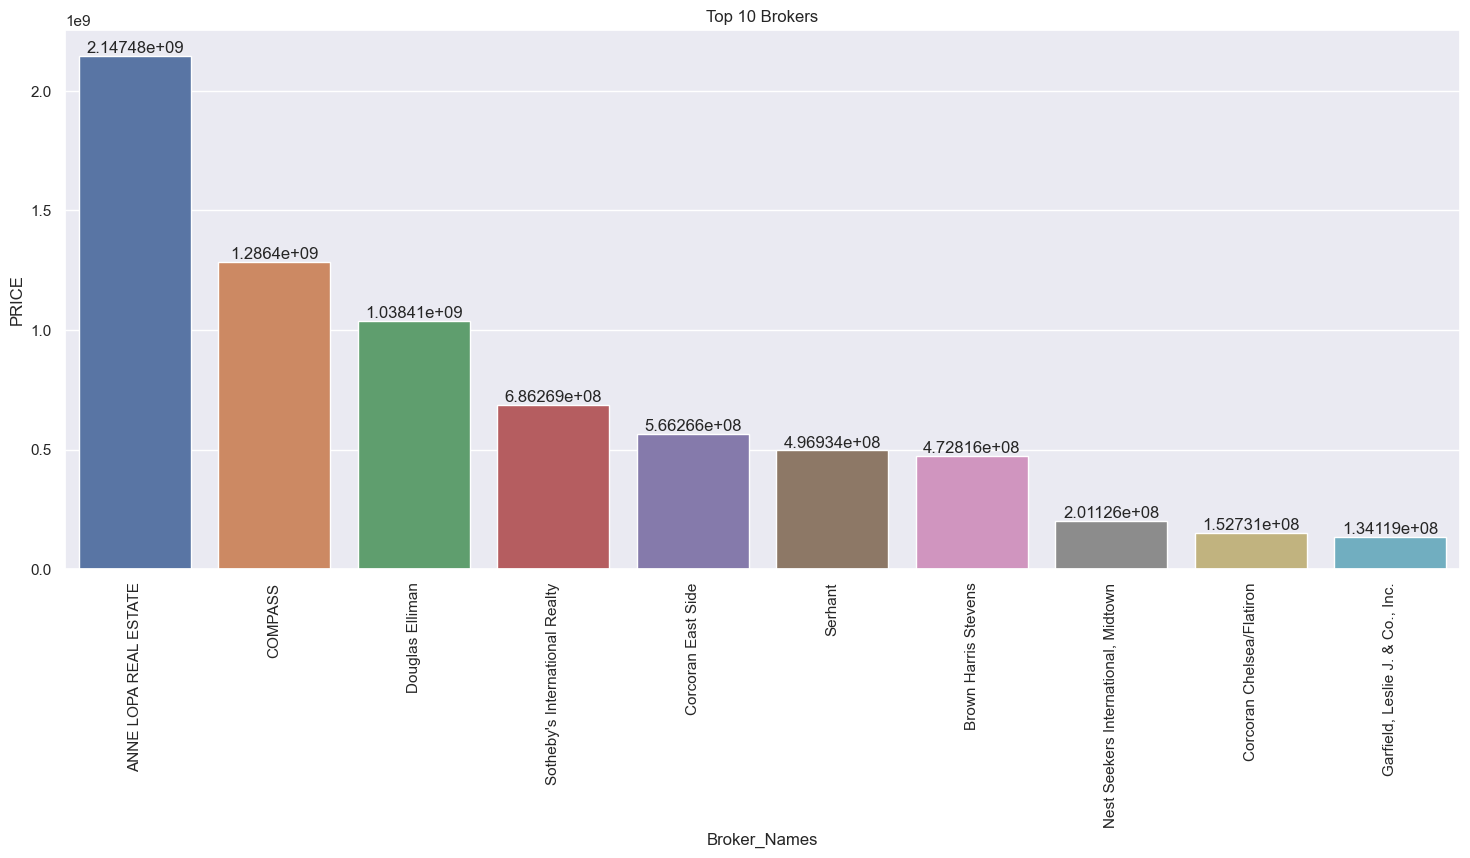

In [167]:
sns.set(rc={'figure.figsize':(18,7)})
plt.xticks(rotation=90)
ax = sns.barplot(x='Broker_Names',y='PRICE',data=top_10_brokers)
plt.title('Top 10 Brokers')

for bars in ax.containers:
    ax.bar_label(bars)
    

In [17]:
broker_sublocality = df.groupby(['Broker_Names','SUBLOCALITY'],as_index=False)['PRICE'].sum().sort_values(by='PRICE',ascending=False).head(10)
broker_sublocality

,Broker_Names,SUBLOCALITY,PRICE
16,ANNE LOPA REAL ESTATE,Richmond County,2147483647
254,COMPASS,New York,558721929
496,Douglas Elliman,New York County,536764898
255,COMPASS,New York County,432149000
1404,Serhant,New York County,369354999
495,Douglas Elliman,New York,332058014
1432,Sotheby's International Realty,New York,320403000
1433,Sotheby's International Realty,New York County,318375000
395,Corcoran East Side,New York County,317664000
394,Corcoran East Side,New York,234934000


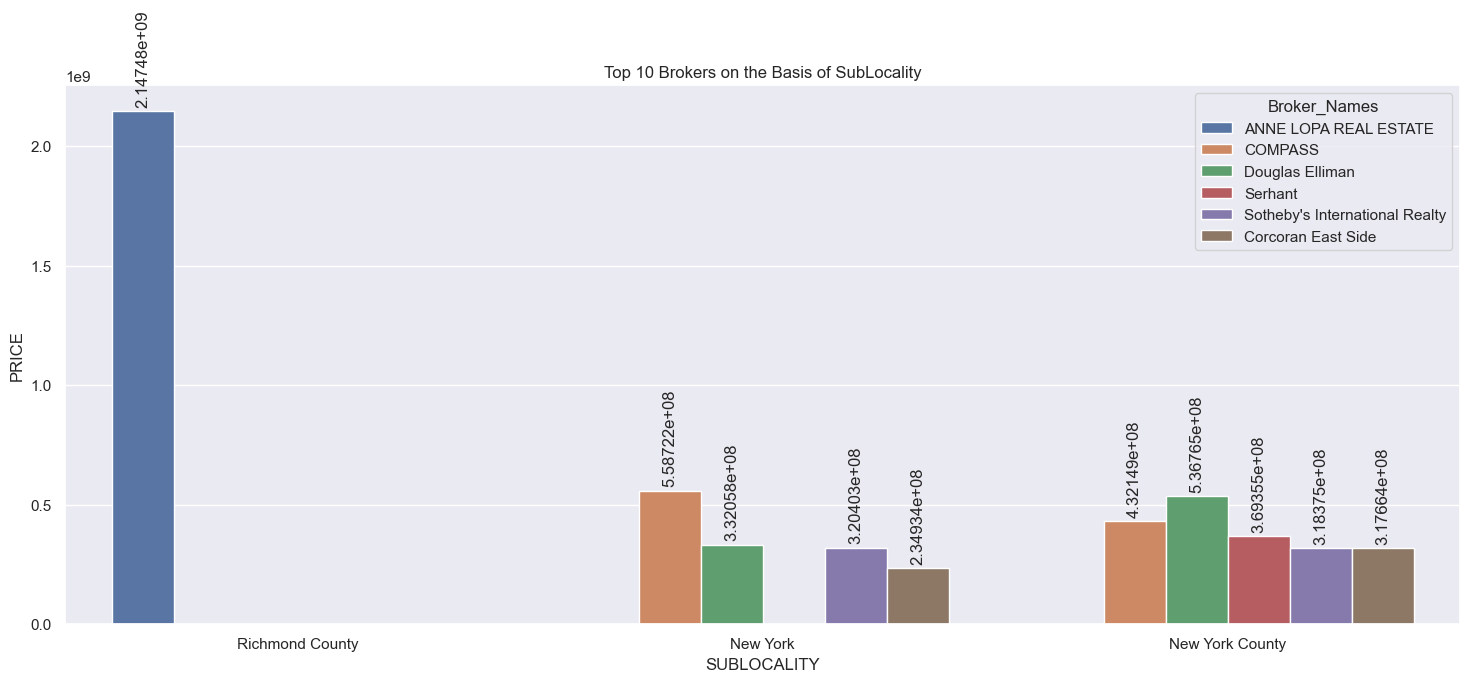

In [168]:
ax = sns.barplot(x='SUBLOCALITY',y='PRICE', data=broker_sublocality,hue='Broker_Names')
plt.title('Top 10 Brokers on the Basis of SubLocality')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90,padding=3)

In [89]:
locality = df.groupby(['Broker_Names','LOCALITY'],as_index=False)['PRICE'].sum().sort_values(by='PRICE',ascending=False).head(10)
locality

,Broker_Names,LOCALITY,PRICE
16,ANNE LOPA REAL ESTATE,New York,2147483647
432,Douglas Elliman,New York,655360173
236,COMPASS,New York,646162650
237,COMPASS,New York County,558721929
1252,Serhant,New York,379498997
1276,Sotheby's International Realty,New York,332935000
352,Corcoran East Side,New York,329974599
433,Douglas Elliman,New York County,329578014
1277,Sotheby's International Realty,New York County,320403000
180,Brown Harris Stevens,New York,251459000


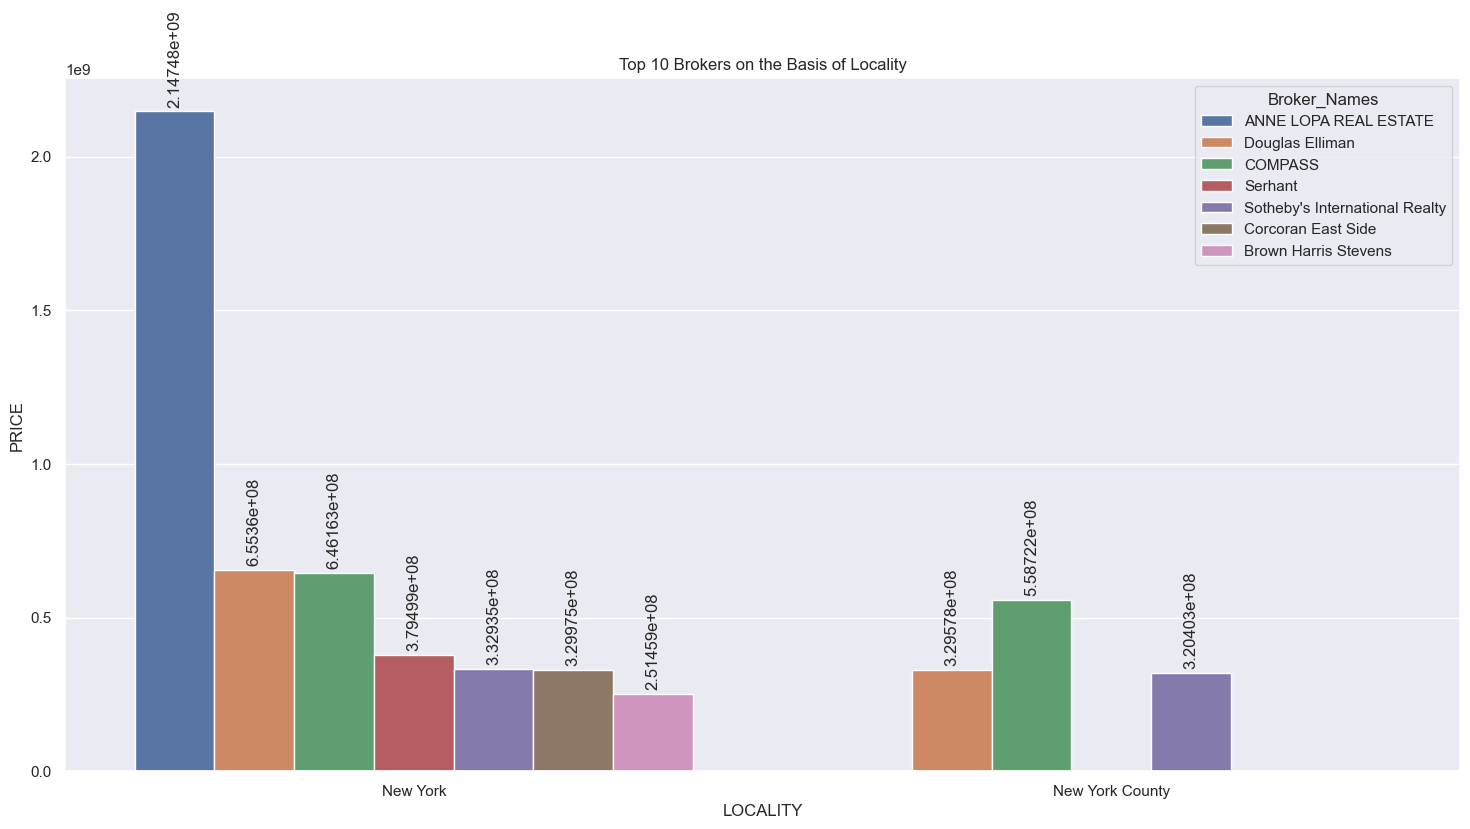

In [169]:
sns.set(rc={'figure.figsize':(18,9)})
ax = sns.barplot(x='LOCALITY',y='PRICE', data=locality,hue='Broker_Names')
plt.title('Top 10 Brokers on the Basis of Locality')

for bars in ax.containers:
    ax.bar_label(bars,rotation=90,padding=3)
sns.move_legend(ax,loc='upper right')

In [21]:
df.groupby('SUBLOCALITY')['PRICE'].sum().sort_values(ascending=False).head(10)

SUBLOCALITY
New York County    2914683797
Richmond County    2605246979
New York           2574577614
Kings County       1305302830
Queens County       776869662
Brooklyn            401194587
Bronx County        313405709
Queens              246271858
Manhattan            75808000
The Bronx            61937390
Name: PRICE, dtype: int64

In [22]:
df.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Broker_Names
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,Douglas Elliman
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,Serhant
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,Sowae Corp


In [23]:
beds_locality = df.groupby('LOCALITY',as_index=False)['BEDS'].count().sort_values(by='BEDS',ascending=False)
beds_locality

,LOCALITY,BEDS
4,New York,2505
5,New York County,979
7,Queens County,557
3,Kings County,464
0,Bronx County,182
8,Richmond County,59
10,United States,37
1,Brooklyn,6
6,Queens,6
9,The Bronx,5


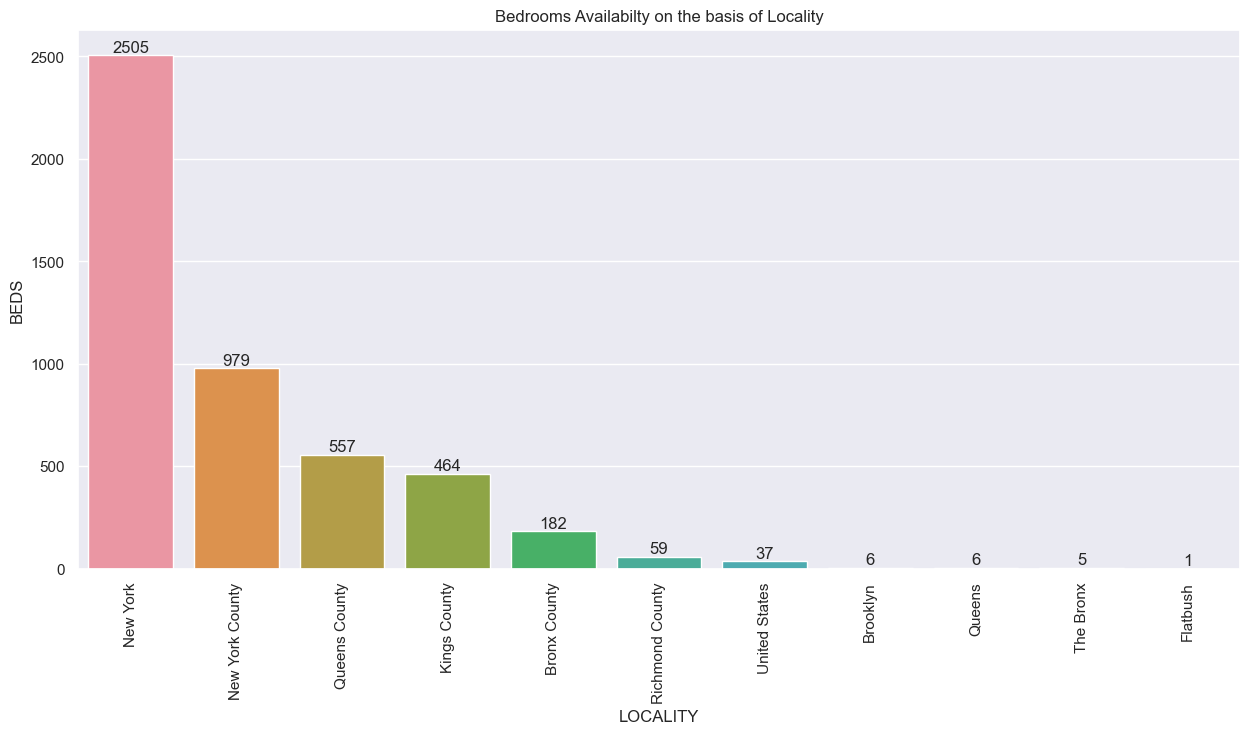

In [171]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(rotation=90)
plt.title('Bedrooms Availabilty on the basis of Locality')
ax = sns.barplot(x='LOCALITY',y='BEDS',data=beds_locality)

for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
df['SUBLOCALITY'].unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [26]:
beds_sublocality = df.groupby('SUBLOCALITY',as_index=False)['BEDS'].count().sort_values(by='BEDS',ascending=False)
beds_sublocality

,SUBLOCALITY,BEDS
11,New York,1016
9,Kings County,727
14,Queens County,684
13,Queens,555
16,Richmond County,480
1,Brooklyn,464
0,Bronx County,307
12,New York County,286
20,The Bronx,184
19,Staten Island,59


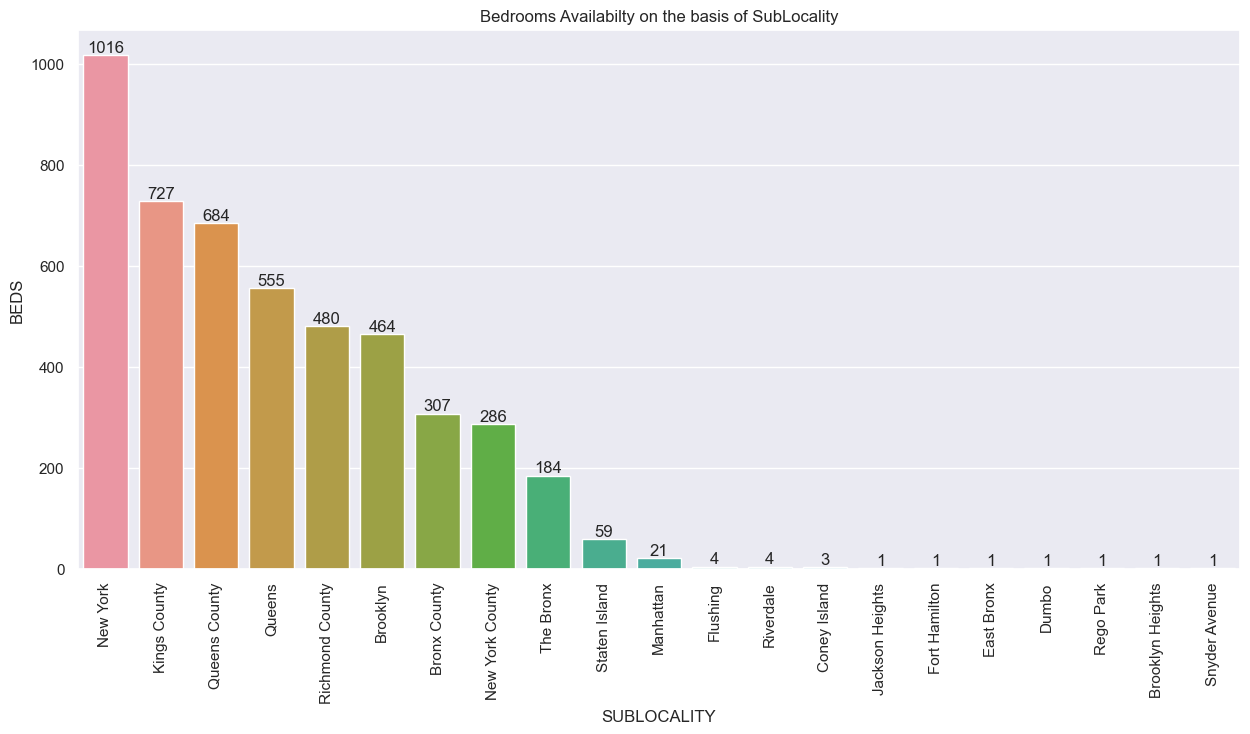

In [172]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(rotation=90)
plt.title('Bedrooms Availabilty on the basis of SubLocality')
ax = sns.barplot(x='SUBLOCALITY',y='BEDS',data=beds_sublocality)

for bars in ax.containers:
    ax.bar_label(bars)

In [34]:
df[['BEDS','BATH','PRICE']]

,BEDS,BATH,PRICE
0,2,2.000000,315000
1,7,10.000000,195000000
2,4,2.000000,260000
3,3,1.000000,69000
4,7,2.373861,55000000
...,...,...,...
4796,1,1.000000,599000
4797,1,1.000000,245000
4798,1,1.000000,1275000
4799,2,1.000000,598125


In [176]:
bed_with_price = df.groupby('BEDS',as_index=False)[['PRICE']].sum().sort_values(by='PRICE',ascending=False)
bed_with_price

,BEDS,PRICE
6,7,2853322148
2,3,2128864960
3,4,1512467904
4,5,1494053187
1,2,1040776234
5,6,904368667
7,8,457266970
0,1,437701369
9,10,116330664
10,11,102596776


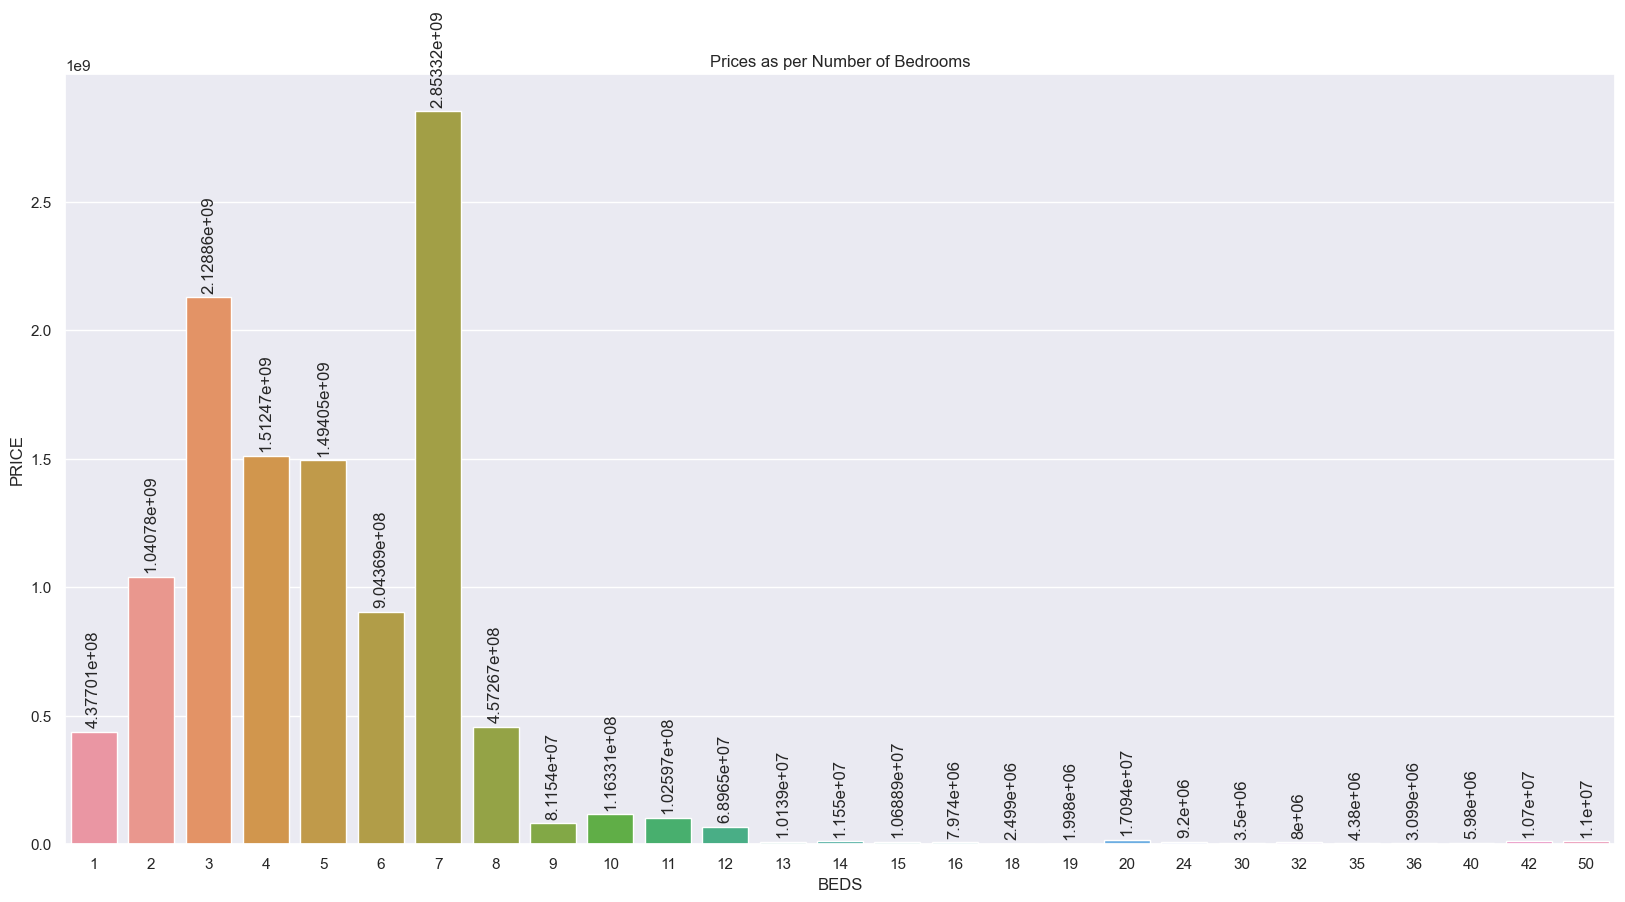

In [177]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(data=bed_with_price, x='BEDS', y='PRICE',ci=None)
plt.title('Prices as per Number of Bedrooms')

for bars in ax.containers:
    ax.bar_label(bars,rotation=90,padding=3)

In [141]:
bath_with_price = df.groupby('BATH',as_index=False)['PRICE'].sum().sort_values(by='PRICE',ascending=False)
bath_with_price

,BATH,PRICE
7,6.000000,3215358070
2,2.000000,2032852680
5,4.000000,1704529400
3,2.373861,1288241081
4,3.000000,793845825
1,1.000000,724448584
9,8.000000,434003000
11,10.000000,433162888
6,5.000000,336997346
8,7.000000,140789000


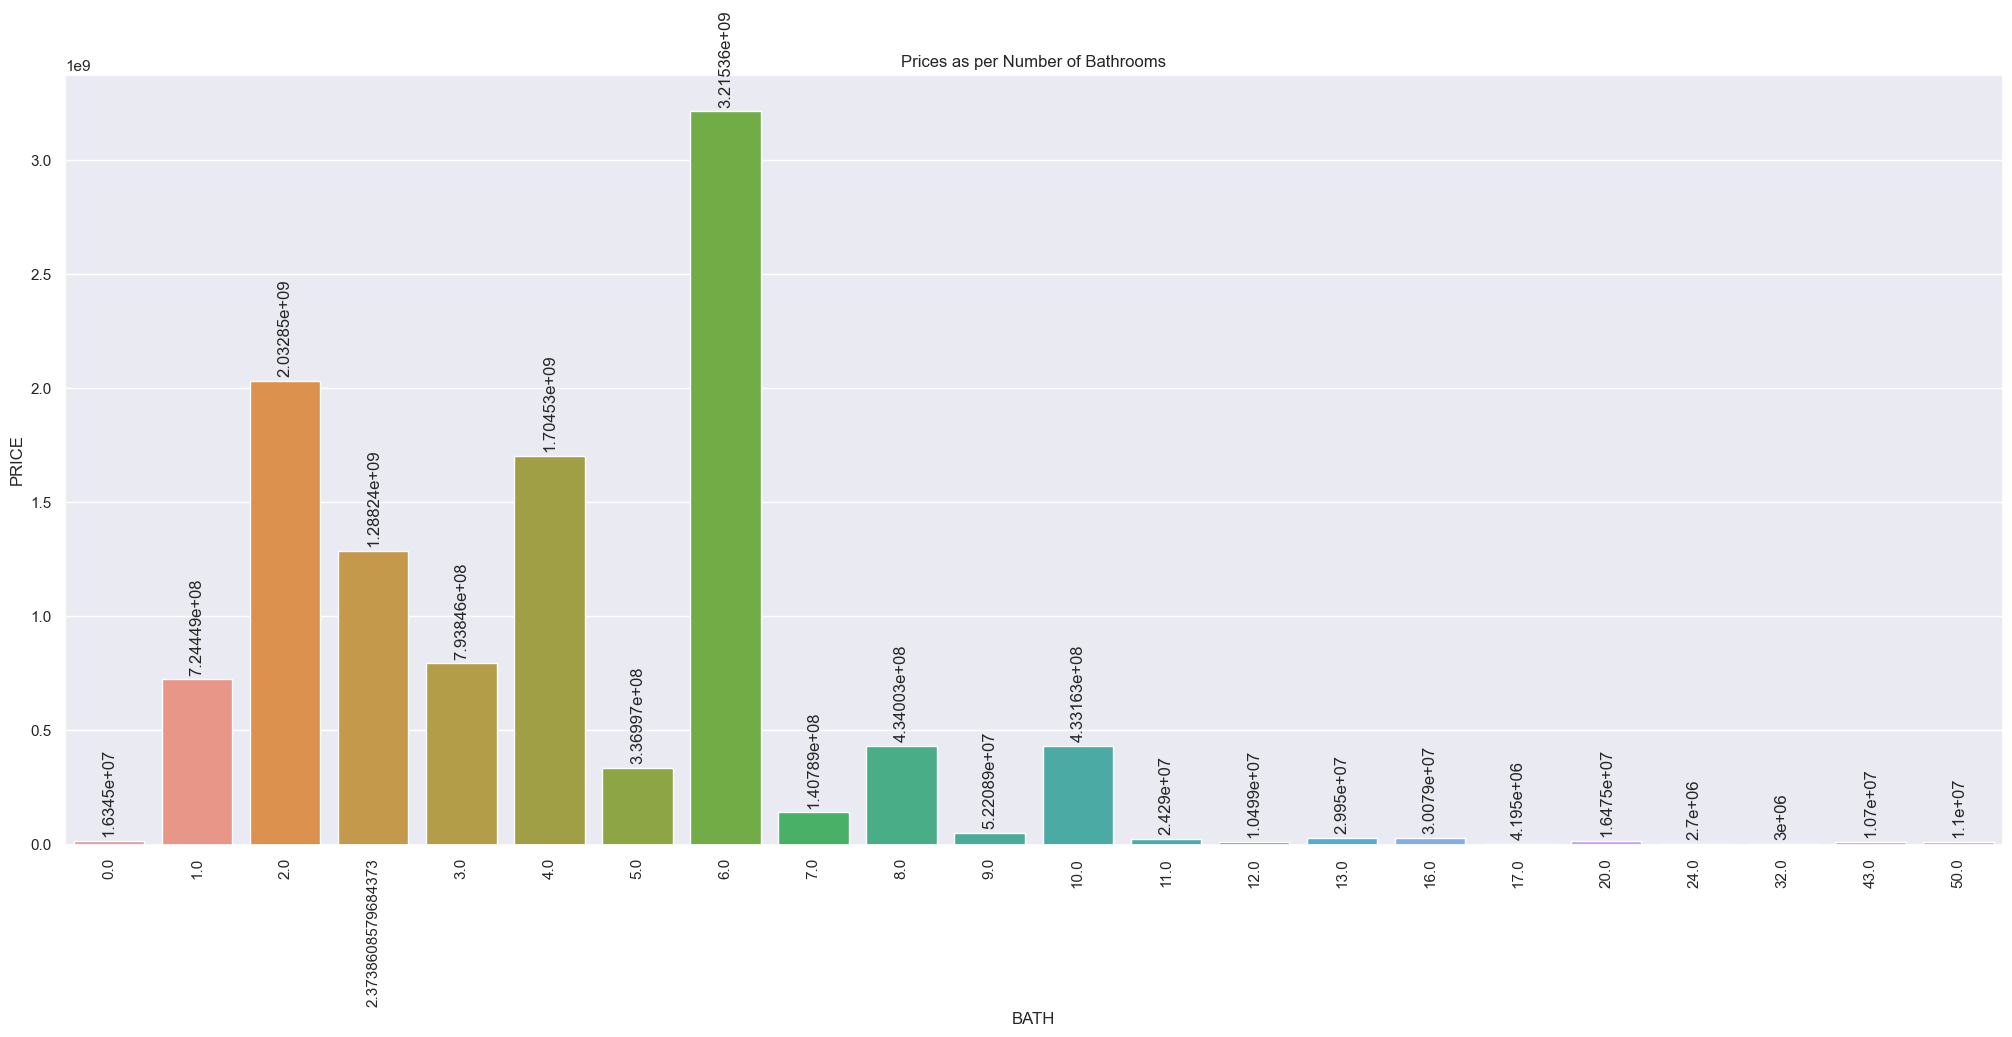

In [182]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.barplot(data=bath_with_price, x='BATH', y='PRICE',ci=None)
plt.title('Prices as per Number of Bathrooms')

plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars,rotation=90,padding=3)


In [155]:
df[['BEDS','BATH','PRICE']].corr()

,BEDS,BATH,PRICE
BEDS,1.000000,0.776447,0.052189
BATH,0.776447,1.000000,0.079371
PRICE,0.052189,0.079371,1.000000


<Axes: >

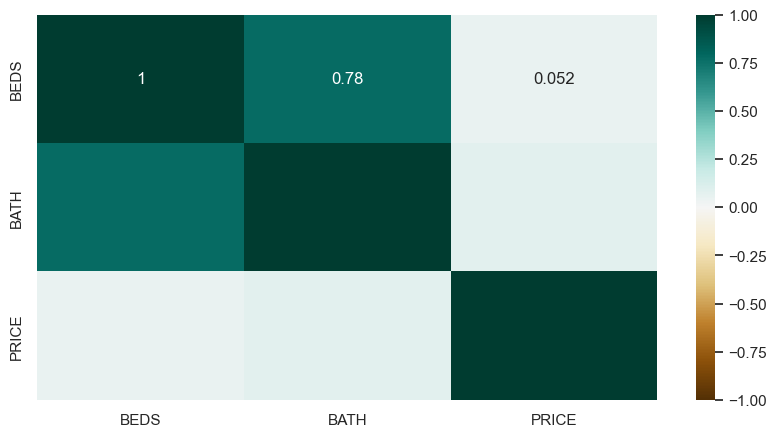

In [158]:
# It is showing the correlation of BEDS, BATH AND PRICE.
corr = df[['BEDS','BATH','PRICE']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap='BrBG',annot=True,vmin=-1,vmax=1)

In [185]:
house_types = df.groupby('TYPE',as_index=False)['PRICE'].sum().sort_values(by='PRICE',ascending=False)
house_types

,TYPE,PRICE
7,House for sale,3728426107
2,Condo for sale,2343962679
12,Townhouse for sale,1903411440
0,Co-op for sale,1595605660
10,Multi-family home for sale,1221670916
11,Pending,325830741
4,Contingent,77666306
8,Land for sale,52578048
5,For sale,39090719
6,Foreclosure,18802145


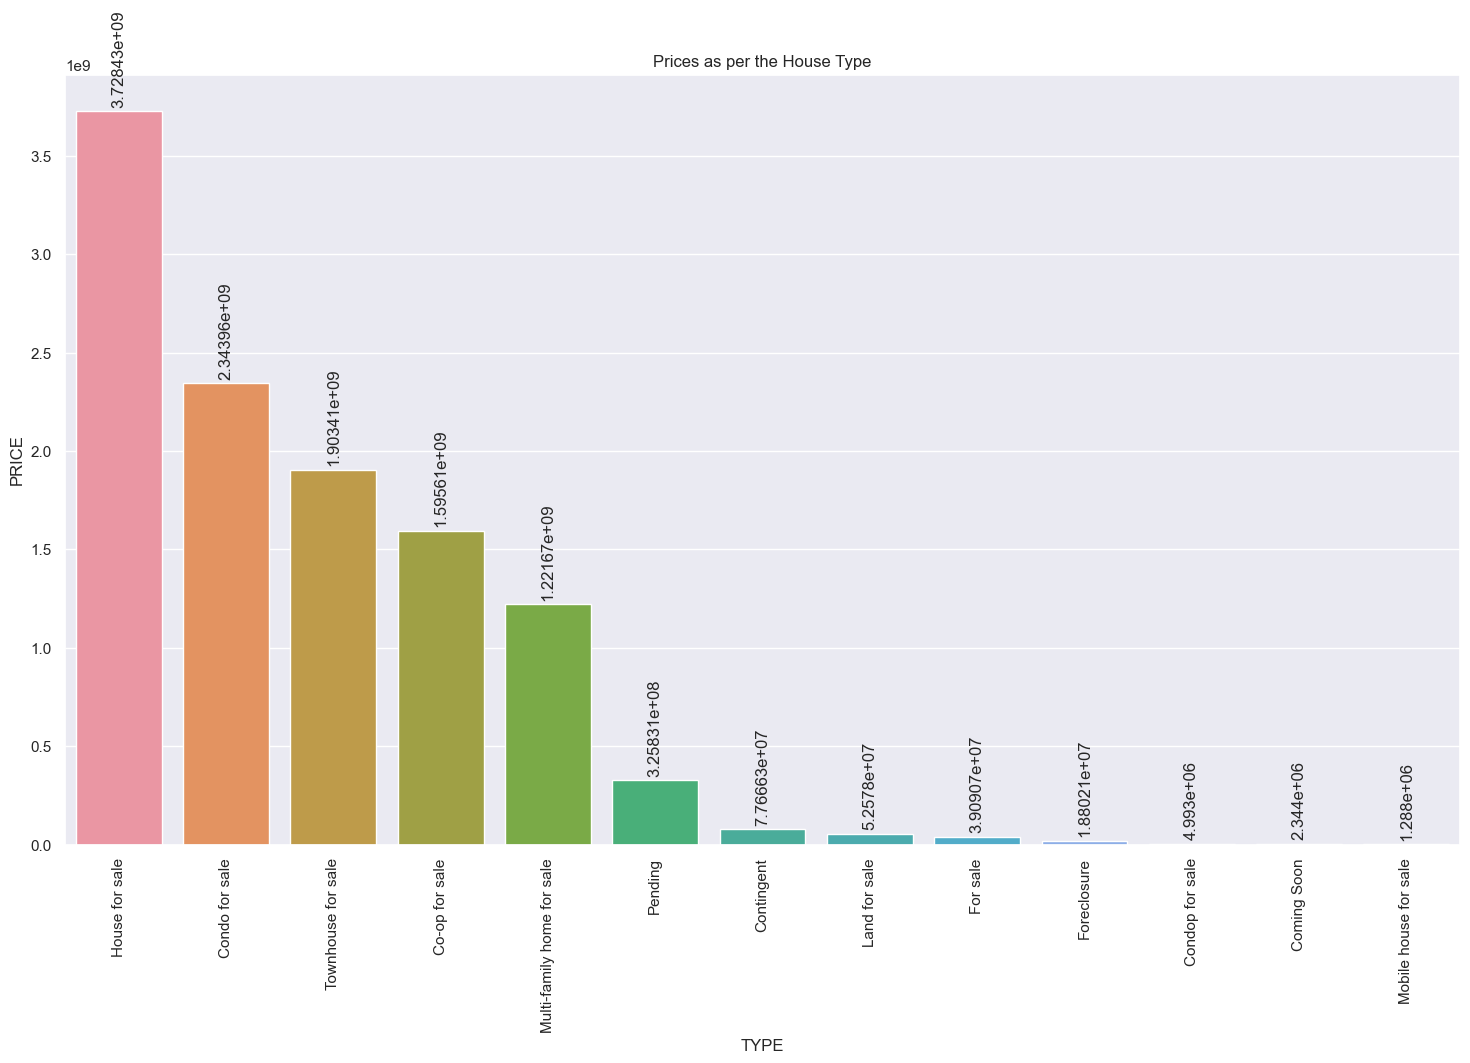

In [191]:
sns.set(rc={'figure.figsize':(20,8)})
    
sns.set(rc={'figure.figsize':(18,10)})
ax = sns.barplot(data=house_types, x='TYPE', y='PRICE',ci=None)
plt.title('Prices as per the House Type')

plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars,rotation=90,padding=3)
